# Trabajo presentado por Ana María Vidal Cataño
https://github.com/UniversidadEAFIT/compubiol_course/blob/master/20231/IntroGenomics/EnsambleKneumoNMD1.ipynb

https://www.ncbi.nlm.nih.gov/bioproject/?term=PRJNA926949

# En este trabajo se utilizó de Lactiplantibacillus plantarum, específicamente de la cepa 92117_i1. https://www.ncbi.nlm.nih.gov/assembly/GCA_028462635.1 

#Primero se descargó la secuencia en el siguiente link https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR23493803&displ
#Luego, se obtuvo el .zip y en la terminal del computador fue copiada hacia apolo.
%%bash



In [ ]:
scp /Users/anamariavidal/Downloads/Lactobacillus_SRR23493803.fasta amvidalc@apolo.eafit.edu.co:/home/amvidalc/Tarea__3

#Paso siguiente, antes de proceder, Se activa el ambiente conda que se creo anteriormente (Ensamblaje)

In [1]:
conda env list
conda activate Ensamblaje

SyntaxError: ignored

#Se activan los paquetes necesarios
#Instaling software and packagets needed
#Fastqc


In [ ]:
conda install -c bioconda fastqc

#Trimmomatic

In [ ]:
conda install -c bioconda trimmomatic

#ABySS

In [ ]:
conda install -c bioconda abyss

#SPAdes

In [ ]:
conda install -c bioconda spades

#Paso siguiente, se procede a chequear la calidad de la secuencia:

In [ ]:
fastqc Lacto_SRR23493803.fastq

#Ya que el archivo generado es formato .html, se necesita pasara la terminal del computador para poder ser abierto

In [ ]:
scp amvidalc@apolo.eafit.edu.co:/home/amvidalc/Tarea__3/ Lactobacillus_SRR23493803.fasta

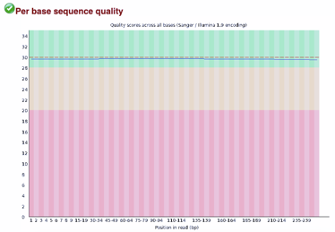

#Paso siguiente, se cortarán los reads con el comando TRIMMOMATIC:

In [ ]:
trimmomatic SE -phred33 Lactobacillusstrains.fastq SLIDINGWINDOW:4:20

#Se chequea la calidad del corte:

In [ ]:
fastqc lactotrimmed.fastq

#Luego, se descarga el archivo:

In [ ]:
scp amvidalc@apolo.eafit.edu.co:/home/amvidalc/Tarea__3/lactotrimmed_fastqc.html .

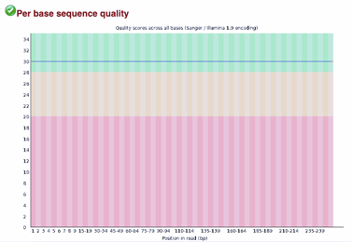

#Paso seguido, se realizó un corte con MINLED = 25 para ver si dicho corte generaba un cambio en los resultados en cuanto a la calidad de corte:


In [ ]:
trimmomatic SE -phred33 Lactobacillusstrains.fastq SLIDINGWINDOW:4:20 MINLEN:25

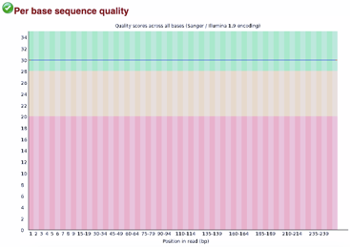

#Paso seguido, se realizó el ensamblaje ABySS amssembly en apolo. Para ello se creo un slurm. Se escogieron 3 diferentes valores de Kmers para ver como impactaban la calidad de ensamble:

#Abyss Kmer = 63

In [ ]:
abyss-pe k=63 se=lactotrimmed.fastq name=lacto_63 "unitigs" 
#Para ver las características del resultado
abyss-fac lacto_63-unitigs.fa


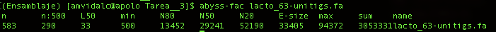

#Abyss Kmer =80 


In [ ]:
abyss-pe k=80 se=lactotrimmed.fastq name=lacto_80 "unitigs" 

#Para ver las características del resultado

In [ ]:
abyss-fac lacto_80-unitigs.fa

Imagen 5.png

#Abyss Kmer = 90

In [ ]:
abyss-pe k=90 se=lactotrimmed.fastq name=lacto_90 "unitigs" 

#Para ver las características del resultado

In [ ]:
abyss-fac lacto_90-unitigs.fa

Imagen 6.png

#Est información se tomó de https://www.ncbi.nlm.nih.gov/assembly/GCF_028462545.1/#/st 

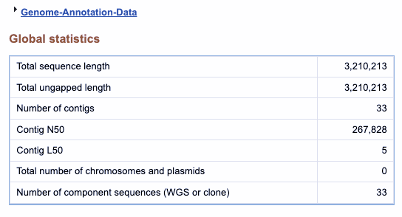

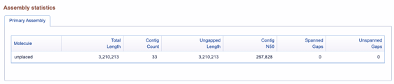

#Con ello se concluye:

En el ejercicio, el valor de Kmer que obtuvo una mejor calidad de ensamble fue el más alto, igual a 90. Otro factor a comparación el valor de L50 el cual que en ensamblaje oficial es 5 mientras que los obtenidos son aproximadamente 3 veces más grande. Teniendo presente que el valor de calidad de ensamble que más se pareció fue el valor Kmer más alto, podrían evaluarse más y observar si los resultados son similares al original. 